In [1]:
# importing required libraries

import pandas as pd
import numpy as np


import sklearn
import joblib


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [2]:
# creating empty lists

models=[]
mae_models=[]
mse_models=[]

In [3]:
# function to append results in the created lists

def test_eval(algorithm, mae,mse):
    models.append(algorithm)
    mae_models.append(mae)
    mse_models.append(mse)

In [4]:
# function for pre-processing

def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    # Remove rows with NaN values
    df.dropna(inplace=True)
    return df

In [5]:

df = pd.read_parquet('output2.parquet')
df = df.iloc[:3000]
df = preprocessing(df)
df

,Open,High,Low,Close,Adj Close,Volume,Symbol,Security Name,vol_moving_avg,adj_close_rolling_med
Date,,,,,,,,,,
1999-12-31,56.866951,57.179901,54.542202,55.302216,47.562416,1931100.0,A,"Agilent Technologies, Inc. Common Stock",5.739950e+06,2937500.0
2000-01-03,56.330471,56.464592,48.193848,51.502148,44.294170,4674300.0,A,"Agilent Technologies, Inc. Common Stock",3.810883e+06,2937500.0
2000-01-04,48.730328,49.266811,46.316166,47.567955,40.910591,4765000.0,A,"Agilent Technologies, Inc. Common Stock",3.461913e+06,2937500.0
2000-01-05,47.389126,47.567955,43.141987,44.617310,38.372894,5758600.0,A,"Agilent Technologies, Inc. Common Stock",3.434607e+06,2937500.0
2000-01-06,44.080830,44.349072,41.577251,42.918453,36.911816,2534400.0,A,"Agilent Technologies, Inc. Common Stock",3.319900e+06,2750800.0
...,...,...,...,...,...,...,...,...,...,...
2011-10-14,23.719599,23.998569,23.619457,23.848354,21.768467,8137000.0,A,"Agilent Technologies, Inc. Common Stock",7.882997e+06,7472500.0
2011-10-17,23.619457,23.934191,23.433475,23.655222,21.592176,6988800.0,A,"Agilent Technologies, Inc. Common Stock",7.851737e+06,7330500.0
2011-10-18,23.626610,24.120173,22.989986,23.948498,21.859880,8460100.0,A,"Agilent Technologies, Inc. Common Stock",7.781300e+06,7330500.0


---

In [6]:
# function for splitting the dataset

def split_data(df, features, target):
    X = df[features]
    y = df[target]
    
    X = scale.fit_transform(X)
    
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [7]:


features = ['vol_moving_avg', 'adj_close_rolling_med']
target = 'Volume'

data = split_data(df, features, target)
data

(array([[-0.52145421, -0.48096798],
        [-0.30077068, -0.49514074],
        [-0.01937826, -0.18999443],
        ...,
        [ 0.17750131,  0.37194663],
        [-0.39058307, -0.48749263],
        [-0.67175167, -0.55757863]]),
 array([[-0.02288198,  0.22568208],
        [-0.31660002, -0.20096967],
        [ 0.12707976,  0.27956447],
        ...,
        [-0.55139967, -0.30799989],
        [-0.21746482, -0.77876866],
        [-0.38154801, -0.60618945]]),
 Date
 2002-01-14    3117200.0
 2006-03-03    2123900.0
 2002-09-16    2697100.0
 2009-05-29    2769200.0
 2010-05-27    3739000.0
                 ...    
 2006-07-10    2189900.0
 2004-05-12    5729000.0
 2004-07-02    2314200.0
 2005-02-25    4985100.0
 2003-06-06    4395400.0
 Name: Volume, Length: 2376, dtype: float64,
 Date
 2009-07-17    2873800.0
 2004-11-11    3480100.0
 2009-07-24    3534100.0
 2001-04-26    2971000.0
 2005-11-14    4946200.0
                 ...    
 2011-08-04    8617500.0
 2005-01-24    4936700.0
 2002-

### # Applying Regression Models for Prediction

### Random Forest

In [8]:
def randomForest(X_train, X_test, y_train, y_test):
    
    
    model=RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Random Forest", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [9]:

randomForest(data[0], data[1], data[2], data[3])

(RandomForestRegressor(random_state=42),
 139.76420168067227,
 405.9434263860565,
 18.74)

### Multiple Linear Regression

In [10]:
def linearRegression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Linear Regression", mae,mse)
    
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [11]:
linearRegression(data[0], data[1], data[2], data[3])

(LinearRegression(), 134.8077952521726, 388.22280597588997, 22.29)

### Decision Tree Regression

In [12]:
def decisiontreeRegression(X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Decision Tree Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)
    

In [13]:
decisiontreeRegression(data[0], data[1], data[2], data[3])

(DecisionTreeRegressor(random_state=0),
 175.24744537815127,
 721.0968161932774,
 -44.35)

### Support Vector Regression

In [14]:
def supportvectorRegression(X_train, X_test, y_train, y_test):
    model=SVR(C=1.0, epsilon=0.2, kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
   
    # errors = abs(y_pred - y_test)
    # mape = 100 * (errors / y_test)
    # accuracy = round(100 - np.mean(mape),2)
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Support Vector Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [15]:
supportvectorRegression(data[0], data[1], data[2], data[3])

(SVR(epsilon=0.2), 149.91676981673086, 530.5897410714459, -6.21)

### Ridge Regression

In [16]:
def ridgeRegression(X_train, X_test, y_train, y_test):  
    model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
  
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Ridge Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [17]:
ridgeRegression(data[0], data[1], data[2], data[3])

(RidgeCV(alphas=[0.1, 1.0, 10.0], cv=10),
 134.76316711450173,
 388.06821276634264,
 22.32)

### XG Boost

In [18]:
def xgboostRegression(X_train, X_test, y_train, y_test):  
    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
   
    #errors = abs(y_pred - y_test)
    #mape = 100 * (errors / y_test)
    #accuracy = round(100 - np.mean(mape),2)
    
  
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("XG Boost Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [19]:
xgboostRegression(data[0], data[1], data[2], data[3])

(XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 140.61509115546218,
 421.20469276511886,
 15.68)

---

##### None of the models are performing good. We'll check the multicollinearity of the predictor variables. 


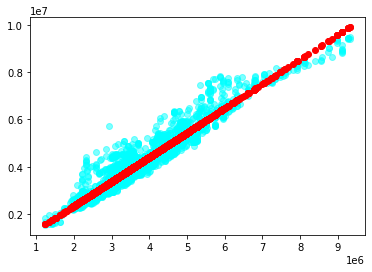

In [20]:
plt.scatter(df['adj_close_rolling_med'], df['vol_moving_avg'], color=['cyan'], alpha=0.5)
m, b = np.polyfit(df['adj_close_rolling_med'], df['vol_moving_avg'], 1)

#use red as color for regression line
plt.scatter(df['adj_close_rolling_med'], m*df['adj_close_rolling_med']+b, color='red')
plt.show()

##### We can see that the two predictors are highly correlated.

##### We'll check multicollinearity by Variation Inflation Factor (VIF)

In [21]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('Volume ~ vol_moving_avg+adj_close_rolling_med', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

                variable        VIF
0              Intercept  12.314427
1         vol_moving_avg  11.704048
2  adj_close_rolling_med  11.704048


##### As we can see, VIF values are higher than 5. There's high multicollinearity. 


##### Also, checking the relation of the response variable with the predictor variables

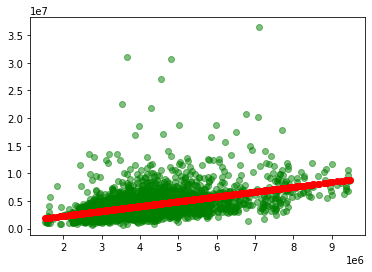

In [22]:
plt.scatter(df['vol_moving_avg'], df['Volume'], color=['green'], alpha=0.5)
m, b = np.polyfit(df['vol_moving_avg'], df['Volume'], 1)

#use red as color for regression line
plt.scatter(df['vol_moving_avg'], m*df['vol_moving_avg']+b, color='red')
plt.show()

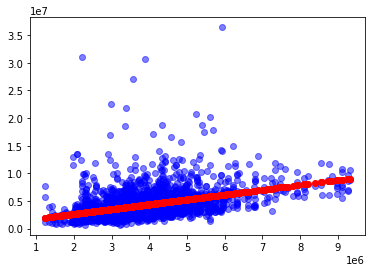

In [23]:
plt.scatter(df['adj_close_rolling_med'], df['Volume'], color=['blue'], alpha=0.5)
m, b = np.polyfit(df['adj_close_rolling_med'], df['Volume'], 1)

#use red as color for regression line
plt.scatter(df['adj_close_rolling_med'], m*df['adj_close_rolling_med']+b, color='red')
plt.show()

---------

### There could be two possible solutions for multicollinearity: either do feature engineering or remove one predictor.

##### We can also do data standardization, but since there's multicollinearity, we'll try to get rid of it. 

### a) Feature Engineering 

+ There is no way we can combine the two predictor variables into one as the resultant variable wasn't meaningful. 
+ Now, we'll try taking square for one of these variables to see if it is making any difference.  

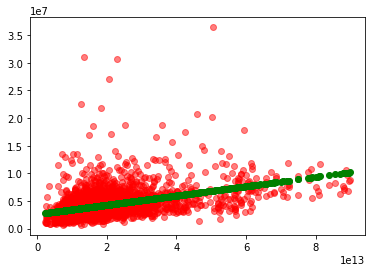

In [24]:
df['vol_moving_avg1'] = df['vol_moving_avg'].pow(2)
plt.scatter(df['vol_moving_avg1'], df['Volume'], color=['red'], alpha=0.5)
m, b = np.polyfit(df['vol_moving_avg1'], df['Volume'], 1)

#use red as color for regression line
plt.scatter(df['vol_moving_avg1'], m*df['vol_moving_avg1']+b, color='green')
plt.show()

##### No, it's not making any difference.

### b) Removing one variable

In [25]:
features = ['adj_close_rolling_med']
target = 'Volume'

data = split_data(df, features, target)
data

(array([[-0.48096798],
        [-0.49514074],
        [-0.18999443],
        ...,
        [ 0.37194663],
        [-0.48749263],
        [-0.55757863]]),
 array([[ 2.25682079e-01],
        [-2.00969670e-01],
        [ 2.79564471e-01],
        [-3.93857396e-01],
        [-3.72036540e-01],
        [-1.77334010e-01],
        [-1.34779609e+00],
        [-4.91640757e-01],
        [ 9.65603545e-01],
        [-1.00198953e+00],
        [-1.50676427e+00],
        [-6.22954780e-01],
        [ 1.38701122e-01],
        [ 1.47947980e-01],
        [-1.49483841e+00],
        [ 1.48148315e+00],
        [-2.98450563e-01],
        [ 1.43226740e+00],
        [ 5.28004056e-02],
        [ 2.18394188e+00],
        [-7.36380022e-01],
        [ 7.85549075e-01],
        [-1.17245147e+00],
        [-3.09123339e-01],
        [ 1.82386044e-01],
        [-3.61795861e-01],
        [-7.40009630e-01],
        [-1.51968394e+00],
        [-2.87518531e-01],
        [-6.37386792e-01],
        [ 2.39552366e-01],
        [ 

##### Now, applying a model

In [26]:
def linearoneRegression(X_train, X_test, y_train, y_test):
    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # errors = abs(y_pred - y_test)
    # mape = 100 * (errors / y_test)
    # accuracy = round(100 - np.mean(mape),2)
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Linear Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [27]:
linearoneRegression(data[0], data[1], data[2], data[3])

(LinearRegression(), 131.69118596457866, 386.295463377677, 22.67)

---

In [28]:
features = ['vol_moving_avg']
target = 'Volume'

data = split_data(df, features, target)
data

(array([[-0.52145421],
        [-0.30077068],
        [-0.01937826],
        ...,
        [ 0.17750131],
        [-0.39058307],
        [-0.67175167]]),
 array([[-2.28819793e-02],
        [-3.16600021e-01],
        [ 1.27079763e-01],
        [-2.08920014e-01],
        [-3.84809260e-01],
        [-3.43678556e-01],
        [-1.36222634e+00],
        [-6.55682536e-01],
        [ 8.23895756e-01],
        [-1.02231519e+00],
        [-1.46720728e+00],
        [-6.13709874e-01],
        [-2.93885013e-02],
        [ 2.02293771e-01],
        [-1.19295818e+00],
        [ 1.58707721e+00],
        [-6.32035778e-01],
        [ 1.89997377e+00],
        [-5.55398169e-02],
        [ 2.76270074e+00],
        [-2.78059137e-01],
        [ 9.94994368e-01],
        [-1.36769107e+00],
        [-2.98124909e-01],
        [ 4.12826649e-02],
        [-4.08845024e-01],
        [-4.81466548e-01],
        [-1.40057805e+00],
        [-4.41089876e-01],
        [-7.16082350e-01],
        [-2.04999848e-02],
        [ 

In [29]:
def linearonevolumeRegression(X_train, X_test, y_train, y_test):
    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # errors = abs(y_pred - y_test)
    # mape = 100 * (errors / y_test)
    # accuracy = round(100 - np.mean(mape),2)
    accuracy = r2_score(y_test, y_pred)
    accuracy = accuracy*100.0
    
    test_eval("Linear Regression", mae,mse)
    return model, mae/10000, mse/10000000000, round(accuracy, 2)

In [30]:
linearonevolumeRegression(data[0], data[1], data[2], data[3])

(LinearRegression(), 133.01395058001435, 382.6656060296854, 23.4)

+ We can see that there is no difference between these models and the previous models with the two variables. 

+ We can conclude that the predictor variables are not able to explain complete variance, and are not able to predict volume. 

#### So, we'll move on with the Random Forest model for the rest of the work sample tasks.

I applied different regression algorithms to predict the volume. After looking at the accuracy, it was concluded that none of the models were performing well.
I checked the correlation between the two predictors and found that they are highly correlated. The model's performance was poor because of multicollinearity. There could be two possible solutions: either do feature engineering or remove one predictor.
For feature engineering, if we combine both of the predictors into one, then the resultant predictor doesn't make any sense.
Removing one predictor: Even after removing one predictor, the models were not performing well.

There wasn't much difference in accuracy among the models, so I moved on with the Random Forest model for the rest of the work sample tasks.